# Online Driver Prediction

We have a lot of driver partner whole nationwide. To know the location and knowing driver online or not, system will ping every 15 second to driver mobile.


## Preparation

In [28]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Read Data

As given data will load here

In [29]:
df = pd.read_csv('drivers.csv', skiprows=0)
df.head()

,driver_id,gender,age,number_of_kids
0,979863,MALE,26,2
1,780123,MALE,60,2
2,614848,MALE,45,4
3,775046,MALE,62,3
4,991601,MALE,23,0


In [40]:
df = pd.read_csv('test.csv', skiprows=0)
df.head()

,driver_id,date,online_hours
0,979863,2017-6-28,7
1,979863,2017-6-27,9
2,979863,2017-6-26,9
3,979863,2017-6-25,10
4,979863,2017-6-24,9


In [31]:
df = pd.read_csv('pings.csv', skiprows=0)
df.head()

,driver_id,ping_timestamp
0,899313,1496278800
1,373017,1496278800
2,798984,1496278800
3,245966,1496278800
4,689783,1496278800


# Take an Analisys


To Predict how long and when driver was online for certain days using forcasting formula with result in below picture
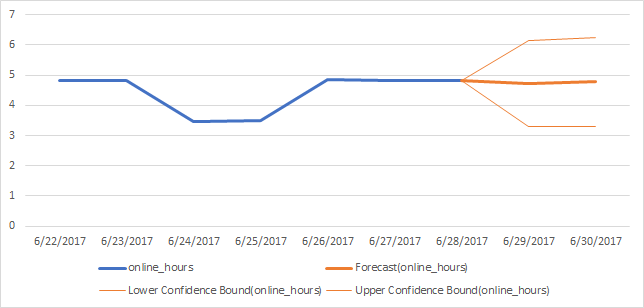

In [41]:
#convert to time series:
data = pd.read_csv('test.csv')
ts = data['date']
ts.head(10)

0    2017-6-28
1    2017-6-27
2    2017-6-26
3    2017-6-25
4    2017-6-24
5    2017-6-23
6    2017-6-22
7    2017-6-28
8    2017-6-27
9    2017-6-26
Name: date, dtype: object

In [42]:
from datetime import datetime
con=data['date']
data['date']=pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2017-06-28', '2017-06-27', '2017-06-26', '2017-06-25',
               '2017-06-24', '2017-06-23', '2017-06-22', '2017-06-28',
               '2017-06-27', '2017-06-26',
               ...
               '2017-06-24', '2017-06-23', '2017-06-22', '2017-06-28',
               '2017-06-27', '2017-06-26', '2017-06-25', '2017-06-24',
               '2017-06-23', '2017-06-22'],
              dtype='datetime64[ns]', name='date', length=17500, freq=None)

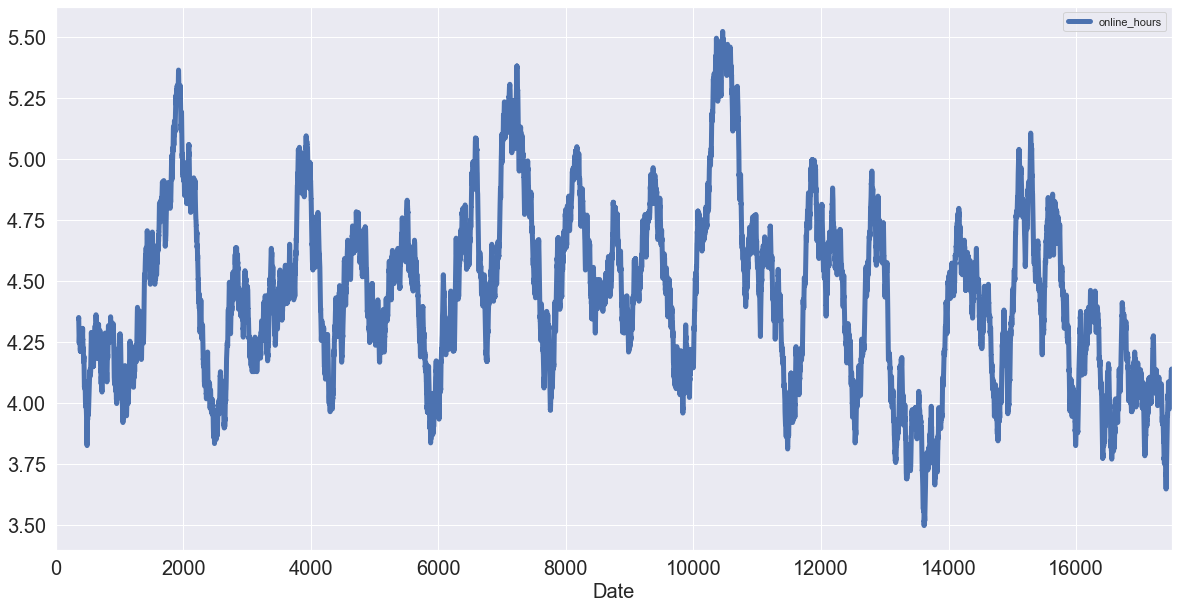

In [53]:
ol = df[['online_hours']]
ol.rolling(360).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);